Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            118 non-null    datetime64[ns]
 1   temperature          40 non-null     float64       
 2   humidity             40 non-null     float64       
 3   wind_speed           40 non-null     float64       
 4   weather_description  40 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.7+ KB

First 5 rows:


,timestamp,temperature,humidity,wind_speed,weather_description
0,2025-02-17 23:00:00,2.031152,-1.562663,1.455588,few clouds
1,2025-02-18 00:00:00,NaN,NaN,NaN,NaN
2,2025-02-18 01:00:00,NaN,NaN,NaN,NaN
3,2025-02-18 02:00:00,1.859226,-1.202741,1.489701,scattered clouds
4,2025-02-18 03:00:00,NaN,NaN,NaN,NaN



Summary Statistics:


,timestamp,temperature,humidity,wind_speed
count,118,4.000000e+01,4.000000e+01,4.000000e+01
mean,2025-02-20 09:30:00,3.608225e-17,1.932482e-16,8.326673e-17
min,2025-02-17 23:00:00,-1.746812e+00,-2.162534e+00,-2.512115e+00
25%,2025-02-19 04:15:00,-6.403142e-01,-8.428184e-01,-5.826298e-01
50%,2025-02-20 09:30:00,-1.653135e-02,1.169748e-01,3.099790e-01
75%,2025-02-21 14:45:00,6.535393e-01,7.468391e-01,7.036934e-01
max,2025-02-22 20:00:00,2.031152e+00,1.796613e+00,1.734173e+00
std,NaN,1.012739e+00,1.012739e+00,1.012739e+00



Missing Values:
timestamp               0
temperature            78
humidity               78
wind_speed             78
weather_description    78
dtype: int64


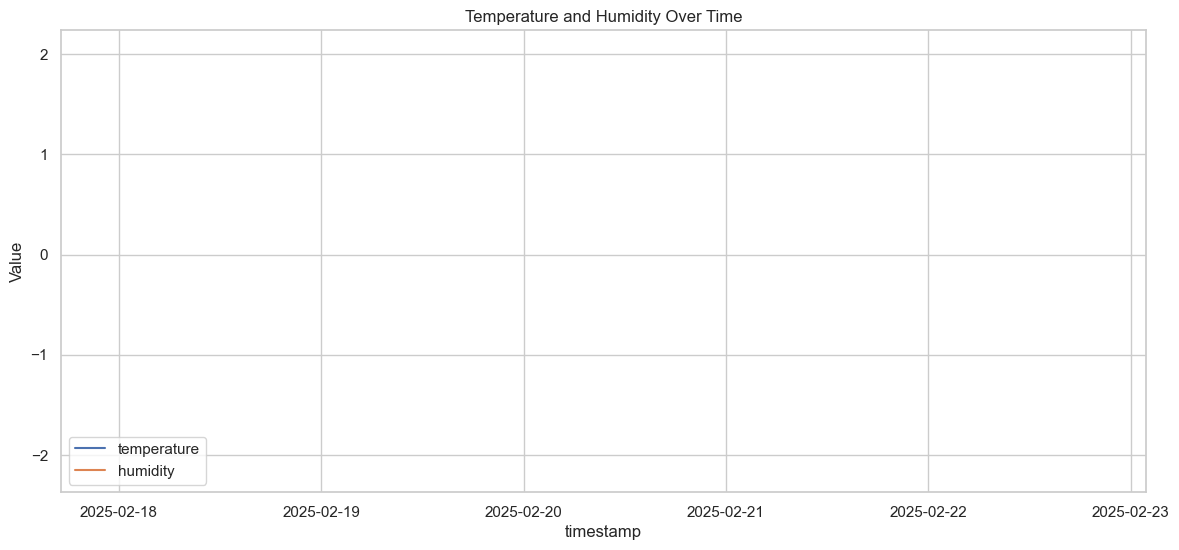

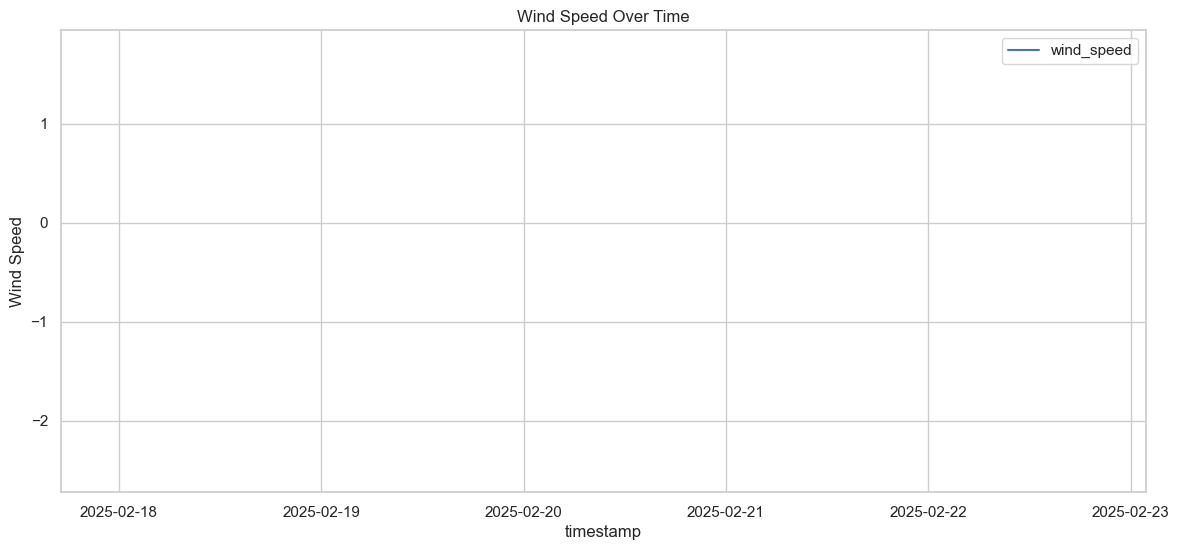

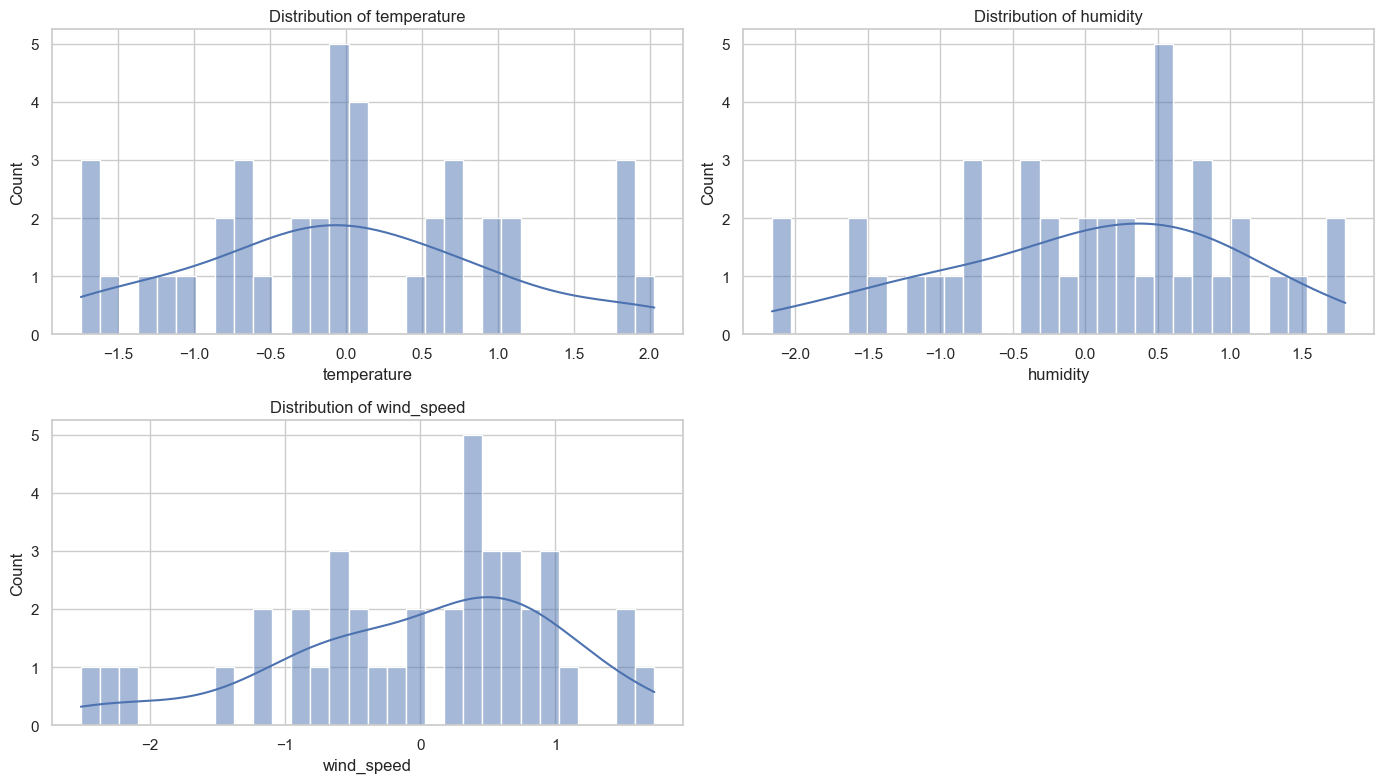

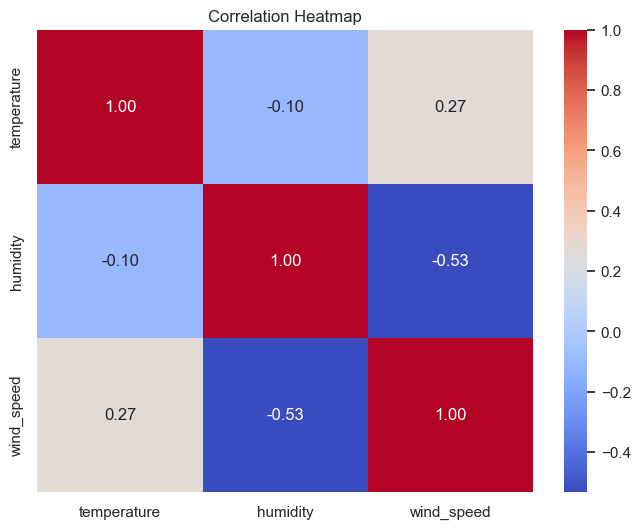

MissingDataError: exog contains inf or nans

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Set up visualization style
sns.set(style="whitegrid")  # Use Seaborn's styling

# Load the cleaned data
cleaned_data_path = "D:/ProjectCQ/Energy-consumption-prediction/energy-consumption-prediction/data/processed/cleaned_data.csv"
df = pd.read_csv(cleaned_data_path)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display basic information about the dataset
print("Dataset Info:")
df.info()

print("\nFirst 5 rows:")
display(df.head())

print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot time-series trends
def plot_time_series(df, x_col, y_cols, title, ylabel):
    """
    Plot time-series data for multiple columns.
    """
    plt.figure(figsize=(14, 6))
    for col in y_cols:
        plt.plot(df[x_col], df[col], label=col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot temperature and humidity over time
plot_time_series(df, 'timestamp', ['temperature', 'humidity'], 
                 'Temperature and Humidity Over Time', 'Value')

# Plot wind speed over time
plot_time_series(df, 'timestamp', ['wind_speed'], 
                 'Wind Speed Over Time', 'Wind Speed')

# Distribution plots
def plot_distribution(df, columns):
    """
    Plot distribution of numeric columns.
    """
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Plot distributions of numeric columns
numeric_cols = ['temperature', 'humidity', 'wind_speed']
plot_distribution(df, numeric_cols)

# Correlation heatmap
def plot_correlation_heatmap(df):
    """
    Plot a correlation heatmap for numeric columns.
    """
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df)

# Stationarity check
def check_stationarity(series, column_name):
    """
    Perform Augmented Dickey-Fuller test for stationarity.
    """
    result = adfuller(series)
    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print(f"Result: {column_name} is stationary.")
    else:
        print(f"Result: {column_name} is non-stationary.")

# Check stationarity of numeric columns
for col in numeric_cols:
    check_stationarity(df[col], col)

# Boxplots for outlier detection
def plot_boxplots(df, columns):
    """
    Plot boxplots for numeric columns to detect outliers.
    """
    plt.figure(figsize=(14, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_cols)

# Pairplot for multivariate analysis
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()